In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.patches import ConnectionPatch
import umap

feature_map = np.load('imgs/mean.npy')
feature_map = feature_map[-1].transpose(1, 2, 0)
feature_map_sgima = np.load('imgs/sigma.npy')
feature_map_sgima = feature_map_sgima[-1].transpose(1, 2, 0)
feature_map_sgima = np.exp(0.5*feature_map_sgima)
x1 = 25
y1 = 25
x2 = 90
y2 = 125

semantic = np.load('imgs/semantic.npy')
true_semantic = np.where(semantic)
# 显示原始布尔数组
plt.imshow(semantic, cmap='gray')

# 绘制为 True 的点
plt.scatter(true_semantic[1], true_semantic[0], color='red', marker='o', s=1)

pedes = np.load('imgs/pedestrian.npy')
true_pedes = np.where(pedes)
# 显示原始布尔数组
plt.imshow(pedes, cmap='gray')

# 绘制为 True 的点
plt.scatter(true_pedes[1], true_pedes[0], color='blue', marker='o', s=1)

drivable = np.load('imgs/drivable.npy')
true_drivable = np.where(drivable==False)
# 显示原始布尔数组
plt.imshow(drivable, cmap='gray')

# 绘制为 True 的点
plt.scatter(true_drivable[1], true_drivable[0], color='grey', marker='o', s=1)

# 设置坐标轴标签
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# 设置标题
plt.title('True Points')

# 显示图形
plt.show()
plt.show()



# 假设你的特征图数据为 feature_map，形状为 (200, 200, 64)
# 这里假设你已经将特征图展平为形状为 (200, 200, 64) 的二维矩阵

# 将特征图展平为 (200*200, 64) 的二维矩阵
flattened_feature_map = feature_map.reshape(-1, 64)

# 假设你有一个形状为 (n_samples, n_features) 的数据集 X

# 创建 UMAP 实例并进行降维
reducer = umap.UMAP(n_components=2)  # 设置降维后的维度为 2
embedded_features = reducer.fit_transform(flattened_feature_map)


# 获取原始特征图的宽度和高度
width, height = feature_map.shape[:2]

# 创建稀疏连接的间隔步长
step = 20

feature_map_sgima =  np.sum(feature_map_sgima, axis=2)
plt.imshow(feature_map_sgima, cmap='gray')  # 将特征图合并为灰度图进行显示

# 可视化特征图和降维后的数据点
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 绘制特征图
feature_map_gray =  np.sum(feature_map, axis=2)
plt.subplot(1, 2, 1)
plt.imshow(feature_map_gray, cmap='gray')  # 将特征图合并为灰度图进行显示
ax1.plot(true_semantic[0][0], true_semantic[1][0],'ro',markersize=1)
ax1.plot(true_semantic[0][20], true_semantic[1][20],'ro',markersize=1)
plt.colorbar()
# plt.xlim((200, 0))
# plt.ylim((0, 200))

plt.title('Feature Map')

# 绘制降维后的数据点
plt.subplot(1, 2, 2)
ax2.scatter(embedded_features[:, 0], embedded_features[:, 1], c='b', alpha=0.1)
plt.title('PCA Visualization')
for i in range(len(true_semantic[0])):
    ax2.plot(embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 0], embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 1],'ro',markersize=5)
    xy2 = (embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 0], embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 1])
    xy1 = (true_semantic[1][i], true_semantic[0][i])
    # con = ConnectionPatch(xyA=xy2, xyB=xy1, coordsA="data", coordsB="data",axesA=ax2, axesB=ax1, color="red")
    # if i%40 == 0:
    #     ax2.add_artist(con)
for i in range(len(true_pedes[0])):
    ax2.plot(embedded_features[true_pedes[0][i]*200+true_pedes[1][i], 0], embedded_features[true_pedes[0][i]*200+true_pedes[1][i], 1],'yo',markersize=5)
for i in range(len(true_drivable[0])):
    plt.plot(embedded_features[true_drivable[0][i]*200+true_drivable[1][i], 0], embedded_features[true_drivable[0][i]*200+true_drivable[1][i], 1],'go',markersize=5)
# plt.plot(embedded_features[x1*200+y1, 0], embedded_features[x1*200+y1, 1],'ro',markersize=5)
# plt.plot(embedded_features[x2*200+y2, 0], embedded_features[x2*200+y2, 1],'ro',markersize=5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')


plt.tight_layout()
plt.show()


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(int64, 1d, A), Literal[int](0))
 
There are 18 candidate implementations:
      - Of which 18 did not match due to:
      Overload of function 'getitem': File: <numerous>: Line N/A.
        With argument(s): '(array(int64, 1d, A), int64)':
       No match.

During: typing of intrinsic-call at /home2/huangzj/anaconda3/envs/stp3/lib/python3.7/site-packages/umap/utils.py (53)
During: typing of static-get-item at /home2/huangzj/anaconda3/envs/stp3/lib/python3.7/site-packages/umap/utils.py (53)

File "../../anaconda3/envs/stp3/lib/python3.7/site-packages/umap/utils.py", line 53:
def tau_rand_int(state):
    <source elided>
    """
    state[0] = (((state[0] & 4294967294) << 12) & 0xFFFFFFFF) ^ (
    ^


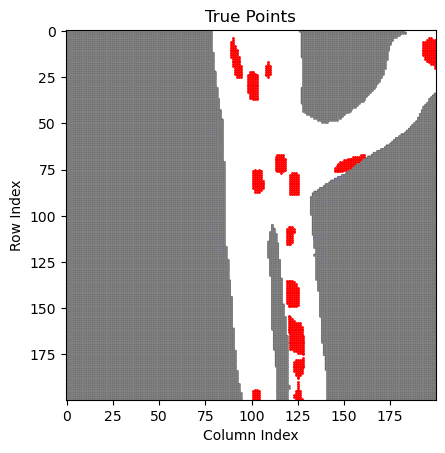

/home2/huangzj/anaconda3/envs/stp3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home2/huangzj/anaconda3/envs/stp3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


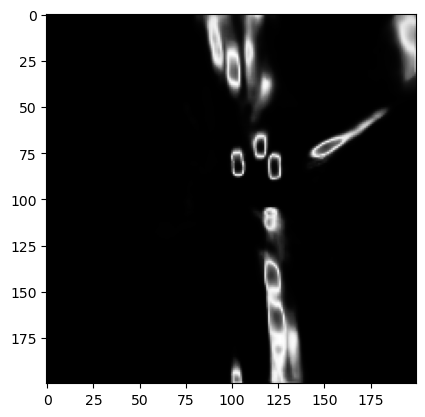

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.patches import ConnectionPatch
import umap

def plot_hist(feature_map):

    # 将 feature_map 展平为一维数组，以便绘制直方图
    flattened_feature_map = feature_map.flatten()

    # 绘制直方图
    plt.hist(flattened_feature_map, bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of Numbers in Feature Map')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


feature_map = np.load('imgs/mean_1.npy')
# feature_map = np.load('imgs/feature_normal.npy')
feature_map = feature_map[-1].transpose(1, 2, 0)

# plot_hist(feature_map)

# feature_map = feature_map+np.random.randn(*feature_map.shape)*1
feature_map_sgima = np.load('imgs/unc_1.npy')
feature_map_sgima = feature_map_sgima[-1].transpose(1, 2, 0)
# feature_map_sgima = np.exp(0.5*feature_map_sgima)
x1 = 25
y1 = 25
x2 = 90
y2 = 125

semantic = np.load('imgs/semantic.npy')
true_semantic = np.where(semantic)
# plot_hist(feature_map[true_semantic[0],true_semantic[1]])

pedes = np.load('imgs/pedestrian.npy')
true_pedes = np.where(pedes)
# plot_hist(feature_map[true_pedes[0],true_pedes[1]])

drivable = np.load('imgs/drivable.npy')
true_drivable = np.where(drivable==False)
# plot_hist(feature_map[true_drivable[0],true_drivable[1]])
false_drivable = np.where(drivable==True)
# plot_hist(feature_map[false_drivable[0],false_drivable[1]])

# 显示原始布尔数组
plt.imshow(semantic, cmap='gray')

# 绘制为 True 的点
plt.scatter(true_semantic[1], true_semantic[0], color='red', marker='o', s=1)

# 显示原始布尔数组
plt.imshow(pedes, cmap='gray')

# 绘制为 True 的点
plt.scatter(true_pedes[1], true_pedes[0], color='blue', marker='o', s=1)

# 显示原始布尔数组
plt.imshow(drivable, cmap='gray')

# 绘制为 True 的点
plt.scatter(true_drivable[1], true_drivable[0], color='grey', marker='o', s=1)

# 设置坐标轴标签
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# 设置标题
plt.title('True Points')

# 显示图形
plt.show()



# 假设你的特征图数据为 feature_map，形状为 (200, 200, 64)
# 这里假设你已经将特征图展平为形状为 (200, 200, 64) 的二维矩阵

# 将特征图展平为 (200*200, 64) 的二维矩阵
flattened_feature_map = feature_map.reshape(-1, 64)

# 假设你有一个形状为 (n_samples, n_features) 的数据集 X

# 创建 t-SNE 实例并进行降维
tsne = TSNE(n_components=2)  # 设置降维后的维度为 2
embedded_features = tsne.fit_transform(flattened_feature_map)

# 获取原始特征图的宽度和高度
width, height = feature_map.shape[:2]

# 创建稀疏连接的间隔步长
step = 20

feature_map_sgima =  np.sum(feature_map_sgima, axis=2)
plt.imshow(feature_map_sgima, cmap='gray')  # 将特征图合并为灰度图进行显示



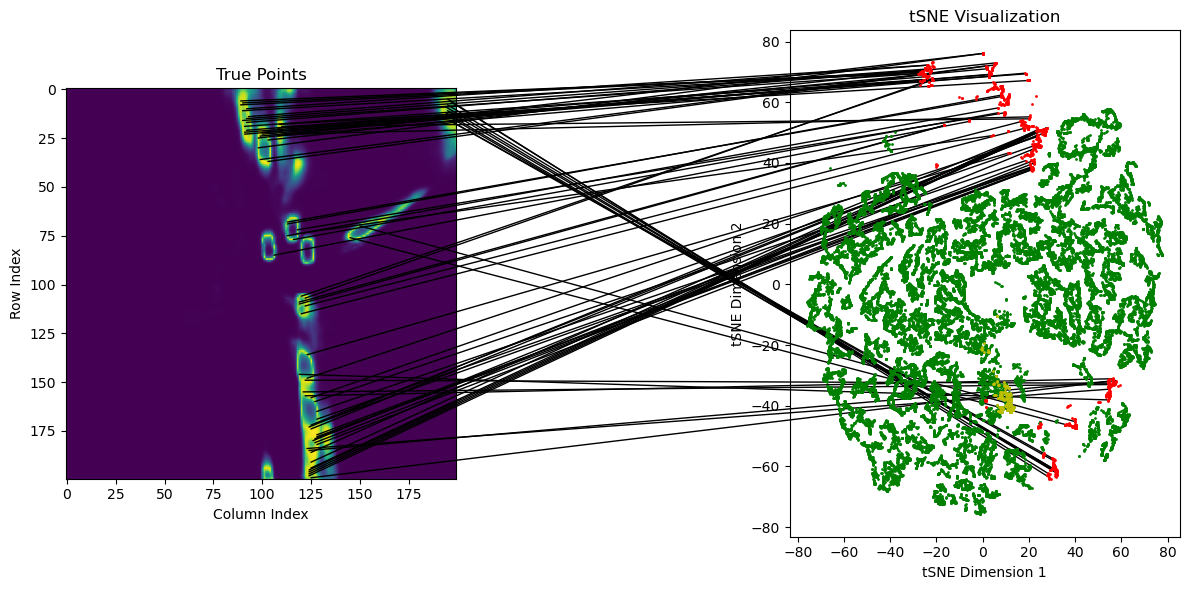

In [16]:
# 可视化特征图和降维后的数据点
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# # 绘制特征图
# feature_map_gray =  np.sum(feature_map, axis=2)
plt.subplot(1, 2, 1)
# plt.imshow(feature_map_gray, cmap='gray')  # 将特征图合并为灰度图进行显示
# ax1.plot(true_semantic[0][0], true_semantic[1][0],'ro',markersize=1)
# ax1.plot(true_semantic[0][20], true_semantic[1][20],'ro',markersize=1)
# plt.colorbar()


# # 绘制为 True 的点
# plt.scatter(true_drivable[1], true_drivable[0], color='green', marker='o', s=1)
# plt.scatter(false_drivable[1], false_drivable[0], color='blue', marker='o', s=1)

# # 绘制为 True 的点
# plt.scatter(true_semantic[1], true_semantic[0], color='red', marker='o', s=1)

# # 绘制为 True 的点
# plt.scatter(true_pedes[1], true_pedes[0], color='yellow', marker='o', s=1)

# feature_map_sgima =  np.sum(feature_map_sgima, axis=2)
plt.imshow(feature_map_sgima, cmap='viridis')


# 设置坐标轴标签
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# 设置标题
plt.title('True Points')


# plt.xlim((200, 0))
# plt.ylim((0, 200))
j = 0

# 绘制降维后的数据点
plt.subplot(1, 2, 2)
# ax2.scatter(embedded_features[:, 0], embedded_features[:, 1], c='b', alpha=0.1)
plt.title('tSNE Visualization')
for i in range(len(true_drivable[0])):
    plt.plot(embedded_features[true_drivable[0][i]*200+true_drivable[1][i], 0], embedded_features[true_drivable[0][i]*200+true_drivable[1][i], 1],'go',markersize=1)
for i in range(len(true_pedes[0])):
    ax2.plot(embedded_features[true_pedes[0][i]*200+true_pedes[1][i], 0], embedded_features[true_pedes[0][i]*200+true_pedes[1][i], 1],'yo',markersize=1)
for i in range(len(true_semantic[0])):
    ax2.plot(embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 0], embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 1],'ro',markersize=1)
    xy2 = (embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 0], embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 1])
    xy1 = (true_semantic[1][i], true_semantic[0][i])
    con = ConnectionPatch(xyA=xy2, xyB=xy1, coordsA="data", coordsB="data",axesA=ax2, axesB=ax1, color="black")
    # if (embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 0]<-30 or embedded_features[true_semantic[0][i]*200+true_semantic[1][i], 1]<-50):
    #     ax2.add_artist(con)
    if feature_map_sgima[true_semantic[0][i], true_semantic[1][i]]>0.7:
        j+=1
        if j%5==0:
            ax2.add_artist(con)


# plt.plot(embedded_features[x1*200+y1, 0], embedded_features[x1*200+y1, 1],'ro',markersize=5)
# plt.plot(embedded_features[x2*200+y2, 0], embedded_features[x2*200+y2, 1],'ro',markersize=5)
plt.xlabel('tSNE Dimension 1')
plt.ylabel('tSNE Dimension 2')


plt.tight_layout()
plt.show()

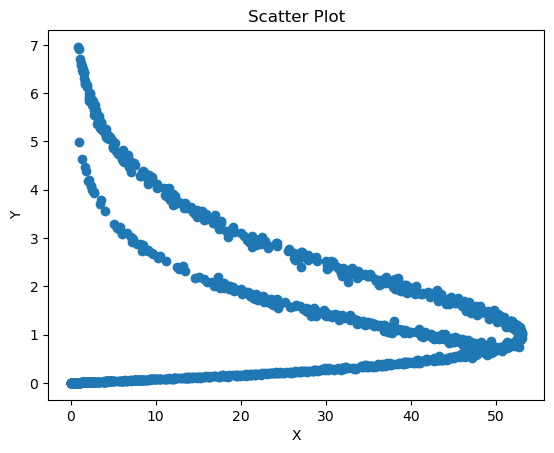

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('/home2/huangzj/github_respo/ST-P3/imgs/debug_imgs/01_16_09_22_14/0022.npy')

# 提取 x 和 y 坐标
x = data[:, 0]
y = data[:, 1]

# 绘制散点图
plt.scatter(x, y)

# 添加标题和标签
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.show()

(-0.5, 199.5, 199.5, -0.5)

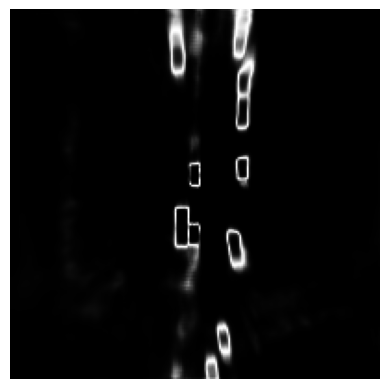

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个形状为 (1, 200, 200) 的示例数组
data = np.load('/home2/huangzj/github_respo/ST-P3/imgs/ce.npy')


# 提取图像数据
image = data[0]

# 绘制灰度图像
plt.imshow(image, cmap='gray')

# 隐藏坐标轴
plt.axis('off')

data = np.load('/home2/huangzj/github_respo/ST-P3/imgs/ee.npy')


# 提取图像数据
image = data

# 绘制灰度图像
plt.imshow(image, cmap='gray')

# 隐藏坐标轴
plt.axis('off')

